In [ ]:
# output 초기화
jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace cctvsu.ipynb

# cctv(자동)

In [1]:
import os
root_dir = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\'
files = os.listdir(root_dir)
print(files)
files2 = os.listdir(root_dir+'\\'+files[0])
files2[0]

['.ipynb_checkpoints', 'cctv(자동오이).ipynb', 'data.yaml', 'images', 'label', 'labels', 'labels.cache', 'train.cache', 'train.txt', 'val.cache', 'val.cache.npy', 'val.txt']


'cctv(자동오이)-checkpoint.ipynb'

## 이미지 이동

In [ ]:
# 라벨링 데이터 이동(copy)
import shutil
for ii in range(0,1):
    files2 = os.listdir(root_dir+'\\'+files[ii])
    for j in files2:
        for i in range(len(root_dir+files[ii]+'\\'+j)):
            print(os.listdir(root_dir+files[ii]+'\\'+j))
            if len(os.listdir(root_dir+files[ii]+'\\'+j))==2:
                label_d=os.listdir(root_dir+files[ii]+'\\'+j)[0]
                print(label_d)
                dir_init=root_dir+files[ii]+'\\'+j+'\\'+label_d
                print(dir_init)
                shutil.move(dir_init,"C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images") 


## 라벨데이터 이동

In [ ]:
# 라벨링 데이터 이동(copy)
import shutil
for ii in range(0,1):
    files2 = os.listdir(root_dir+'\\'+files[ii])
    for j in files2:
        for i in range(len(root_dir+files[ii]+'\\'+j)):
#             print(os.listdir(root_dir+files[ii]+'\\'+j))
            if len(os.listdir(root_dir+files[ii]+'\\'+j))==1:
                label_d=os.listdir(root_dir+files[ii]+'\\'+j)[0]
#                 print(label_d)
                dir_init=root_dir+files[ii]+'\\'+j+'\\'+label_d
#                 print(dir_init)
                shutil.move(dir_init,"C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels") 


## json 파일 type '사각형' -> bbox 수정

In [ ]:
import json

file_path = "C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\"
for i in os.listdir(file_path):
#     print(i)
#     print(file_path+i)
    pathupdate=file_path+i
    with open(pathupdate, 'r', encoding='UTF-8') as f:
        print(f)
        json_data = json.load(f)
        for j in range(len(json_data["result"])):
            json_data["result"][j]['type']="bbox"
    with open(pathupdate, 'w', encoding='UTF-8') as f:
        json.dump(json_data, f,ensure_ascii=False, indent="\t")

## segmentation 수정 코드

In [ ]:
# file_path = "C:\\Users\\user\\Desktop\\오이생육\\cucumber\\label\\"
# for i in os.listdir(file_path):
#     print(i)
#     pathupdate=file_path+i
#     with open(pathupdate, 'r', encoding='UTF-8') as f:
#         json_data = json.load(f)
#         for j in range(len(json_data["result"])):
#             if "points" in json_data["result"][j]:
#                 json_data["result"][j]['segmentation']=json_data["result"][j].pop('points')
#     with open(pathupdate, 'w', encoding='UTF-8') as f:
#         json.dump(json_data, f, ensure_ascii=False,indent="\t")

# 라벨링 데이터 통계

In [2]:
import os
root_dir = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\'
files = os.listdir(root_dir)
files[0]

'V003_2_3_1_1_3_1_1_1_0_0_20220728_100_20220925004517.txt'

## bbox 통계

In [3]:
import json
ctau_bbox=[]
for i in os.listdir(root_dir):
    pathupdate=root_dir+i
    with open(pathupdate, 'r', encoding='UTF-8') as f:
#         print(f)
        json_data = json.load(f)
        for j in range(len(json_data["result"])):
            ctau_bbox.append(json_data["result"][j]["attrb"])
#             if "attrb" not in json_data["result"][j]:
#                 sick_bbox.append(json_data["result"][j]["attrb"])


JSONDecodeError: Extra data: line 1 column 3 (char 2)

In [31]:
ctau_bbox_set=list(set(ctau_bbox))

In [32]:
ctau_count=[]
for i in ctau_bbox_set:
    ctau_count.append(ctau_bbox.count(i))
    print("{} : {}".format(i,ctau_bbox.count(i)))

꽃 : 27199
성숙과 : 126991
미성숙과 : 1054
생장점 : 3335


In [33]:
sum(ctau_count)

158579

In [35]:
import pandas as pd
ctau_count
ctau_df=pd.DataFrame({"분류":ctau_bbox_set,"개수":ctau_count})
ctau_df

,분류,개수
0,꽃,27199
1,성숙과,126991
2,미성숙과,1054
3,생장점,3335


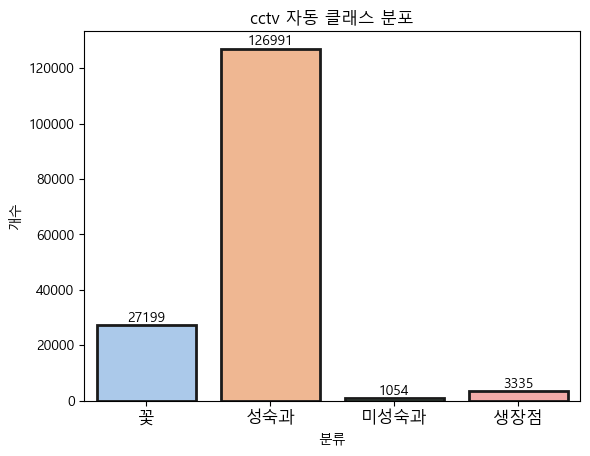

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
g=sns.barplot(data=ctau_df, x="분류", y="개수", ci=None,
            dodge=False,palette='pastel',linewidth=2,edgecolor=".1")
ax = g

#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
       textcoords='offset points') 

plt.xticks(fontsize=12)

plt.title("cctv 자동 클래스 분포")
plt.show()

## class 이상 확인 후 normalxclass list에 담기

In [ ]:
# import json

# normalxclass=[]
# file_path = "C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\해충트랩\\해충\\label\\"
# for i in os.listdir(file_path):
# #     print(i)
# #     print(file_path+i)
#     pathupdate=file_path+i
#     with open(pathupdate, 'r', encoding='UTF-8') as f:
#         json_data = json.load(f)
#         for j in range(len(json_data["result"])):
#             if json_data["result"][j]['attrb']=="":
#                  del json_data["result"][j]
#     with open(pathupdate, 'w', encoding='UTF-8') as f:
#         json.dump(json_data, f,ensure_ascii=False, indent="\t")

In [24]:
import json

normalxclass=[]
file_path = "C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\label\\"
for i in os.listdir(file_path):
#     print(i)
#     print(file_path+i)
    pathupdate=file_path+i
    with open(pathupdate, 'r', encoding='UTF-8') as f:
        json_data = json.load(f)
        for j in range(len(json_data["result"])):
            if json_data["result"][j]['attrb']=="꽃, 미성숙과":
#                 json_data["result"][j]['attrb']="성숙과"
#     with open(pathupdate, 'w', encoding='UTF-8') as f:
#         json.dump(json_data, f,ensure_ascii=False, indent="\t")
                normalxclass.append(str(f).split('\\')[-1].split('.')[0])

In [25]:
normalxclass

['V003_2_3_1_1_4_1_1_1_0_0_20220722_1677_20220922021419',
 'V003_2_3_1_1_4_1_1_1_0_0_20220722_1699_20220922021510',
 'V003_2_3_1_1_4_1_1_1_0_0_20220722_1853_20220922021621',
 'V003_2_3_1_1_4_1_1_1_0_0_20220722_2161_20220922022017']

## 이상 클래스 이미지 파일 제거

In [26]:
import shutil
pestimg=os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\')
for j in normalxclass:
    for i in range(len(pestimg)):
        if pestimg[i].split('.')[0]==j:
            os.remove('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\'+pestimg[i])

## 폴더 파일개수 확인

In [27]:
len(os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\'))

86861

## 이상 클래스 라벨링 파일 제거

In [28]:
import shutil
pestimg=os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\')
for j in normalxclass:
    for i in range(len(pestimg)):
        if pestimg[i].split('.')[0]==j:
            os.remove('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\'+pestimg[i])

## 폴더 파일개수 확인

In [29]:
len(os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\'))

86861

## 이상 class명 수정

In [ ]:
# import json

# file_path = "C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\label\\"
# for i in os.listdir(file_path):
# #     print(i)
# #     print(file_path+i)
#     pathupdate=file_path+i
#     with open(pathupdate, 'r', encoding='UTF-8') as f:
#         json_data = json.load(f)
#         for j in range(len(json_data["result"])):
#             if json_data["result"][j]['attrb']=="":
#                 print(f)
#                 json_data["result"][j]['attrb']=""
#     with open(pathupdate, 'w', encoding='UTF-8') as f:
#         json.dump(json_data, f,ensure_ascii=False, indent="\t")

# cctv 자동 yolov5

In [40]:
import os
import glob
from PIL import Image
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 이미지 크기 통일

In [ ]:

# import os
# import glob
# from PIL import Image

# files = glob.glob('C:\\Users\\user\\Desktop\\trap\\export\\images\\*')

# for f in files:
#     title, ext = os.path.splitext(f)
#     if ext in ['.jpg', '.png']:
#         img = Image.open(f)
#         img_resize = img.resize((256,256))
#         # print(title + ext)
#         img_resize.save(title + ext)


In [42]:
import os
root_dir = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\label\\'
dir_list=os.listdir(root_dir)
print(dir_list)
print(dir_list[0])
print(dir_list[0].split('.'))
print(dir_list[0].split('.')[0])
files = os.listdir(root_dir)
files[0]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'V003_2_3_1_1_3_1_1_1_0_0_20220728_100_20220925004517.json'

## 이미지 파일 읽어오기

In [43]:
import pickle
import cv2
import numpy as np
import platform

## 경로에 한글포함이면 decoding 해줘야함
def hangulFilePathImageRead ( filePath ) :

    stream = open( filePath.encode("utf-8") , "rb")
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8)

    return cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)


if __name__ == '__main__':
    # OS Platform 정보
    print(platform.platform())

    filePath = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\'+dir_list[1].split(".")[0]+'.jpg'

    fileData = hangulFilePathImageRead(filePath)
    print(fileData)
    print(fileData.shape)

Windows-10-10.0.19045-SP0
[[[ 88  99  83]
  [ 86  97  81]
  [ 88  98  82]
  ...
  [ 57  79  60]
  [ 58  80  61]
  [ 59  81  62]]

 [[ 89 100  84]
  [ 91 102  86]
  [ 93 104  88]
  ...
  [ 58  80  61]
  [ 58  80  61]
  [ 56  81  61]]

 [[117 128 112]
  [119 130 114]
  [117 128 112]
  ...
  [ 55  80  60]
  [ 54  79  59]
  [ 53  78  58]]

 ...

 [[190 185 187]
  [191 186 188]
  [192 187 189]
  ...
  [177 164 172]
  [167 154 162]
  [162 149 157]]

 [[189 184 186]
  [190 185 187]
  [192 187 189]
  ...
  [164 151 159]
  [152 139 147]
  [145 132 140]]

 [[188 183 185]
  [189 184 186]
  [190 185 187]
  ...
  [160 147 155]
  [149 136 144]
  [141 128 136]]]
(600, 800, 3)


## 이미지 파일 shape 도출

In [44]:
img = hangulFilePathImageRead(filePath)

In [45]:
float(img.shape[0])

600.0

In [1]:
img_size=[]
for i in dir_list:
    filepath='C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\'+i.split(".")[0]+'.jpg'
    img = hangulFilePathImageRead(filepath)
    img_size.append(img.shape)
set(img_size)

## yolov5 라벨링 text 파일 만들기

In [47]:
import os
import json
root_dir = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\label\\'
dir_list=os.listdir(root_dir)
d=0
for i in dir_list:
    filepath='C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\'+i.split(".")[0]+'.jpg'
    img = hangulFilePathImageRead(filepath)

    with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\label\\'+i, "r",encoding="utf-8",errors='ignore') as json_file:
        json_data = json.load(json_file)
        x_scale=1/float(json_data["description"]["width"])
        y_scale=1/float(json_data["description"]["height"])
        a_list=[]
#         x_scale=1/float(img.shape[0])
#         y_scale=1/float(img.shape[1])
#         json_data = json.load(json_file)
#         a_list=[]
        
        for j in range(len(json_data['result'])):
            x=json_data['result'][j].get('x')
            y=json_data['result'][j].get('y')
            w=json_data['result'][j].get('w')
            h=json_data['result'][j].get('h')
            a_list.append([(x+w/2.0)*x_scale,(y+h/2.0)*y_scale,w*x_scale,h*y_scale]) # yolo 정규화
    
    f = open("C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\labels\\"+i.split('.')[0]+".txt", 'w')
    for e in range(len(a_list)):
        if json_data['result'][e].get("attrb")=="꽃":
            f.write("1 ")
            for r in range(len(a_list[e])):
                f.write(str(a_list[e][r]) + " ")
            f.write("\n")
        elif json_data['result'][e].get("attrb")=="성숙과":
            f.write("2 ")
            for r in range(len(a_list[e])):
                f.write(str(a_list[e][r]) + " ")
            f.write("\n")
        elif json_data['result'][e].get("attrb")=="미성숙과":
            f.write("2 ")
            for r in range(len(a_list[e])):
                f.write(str(a_list[e][r]) + " ")
            f.write("\n")
        elif json_data['result'][e].get("attrb")=="생장점":
            f.write("0 ")
            for r in range(len(a_list[e])):
                f.write(str(a_list[e][r]) + " ")
            f.write("\n")
        
    f.close()

## 이미지 데이터 라벨링 데이터 수량 비교

In [48]:
for i in os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images'):
    if os.path.exists("C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\labels\\"+i.split('.')[0]+".json"):
        print(i)

## yaml 파일 생성

In [49]:
import yaml
fruits = {'train': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\train.txt',
          'val': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\val.txt',
          'nc': '3',
          'names':['생장점','꽃','과실']}
with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\data.yaml', 'w') as f:
    yaml.dump(fruits, f)

## 이미지 데이터 모아놓기

In [2]:
from glob import glob

img_list = glob('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\*.jpg')
# img_list2=glob('C:\\Users\\user\\Desktop\\오이생육\\cucumber\\export\\images2\\*.jpg')
# img_list.append(glob('C:\\Users\\user\\Desktop\\오이생육\\cucumber\\export\\images2\\*.jpg'))
# for i in range(len(glob('C:\\Users\\user\\Desktop\\오이생육\\cucumber\\export\\images2\\*.jpg'))):
#     img_list.append(glob('C:\\Users\\user\\Desktop\\오이생육\\cucumber\\export\\images2\\*.jpg')[i])
# print(len(img_list[-1]))
# img_list=img_list+img_list2
print(len(img_list))

86860


In [3]:
for i in range(len(img_list)):
    img_list[i]=img_list[i].replace('\\','/')
print(img_list[0])

C:/Users/user/Desktop/NIA_최종데이터_1207/cctv(자동오이)/images/V003_2_3_1_1_3_1_1_1_0_0_20220728_100_20220925004517.jpg


## test val 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=1000)

print(len(train_img_list), len(val_img_list))

69488 17372


In [5]:
with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\train.txt','w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\val.txt','w') as f:
    f.write('\n'.join(val_img_list) + '\n')


In [6]:
import yaml
with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\data.yaml', 'r') as f:
    data = yaml.load(f,Loader=yaml.FullLoader)

print(data)

data['train'] = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\train.txt'
data['val'] = 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\val.txt'
data['nc'] = '3'
data['names'] = ['생장점','꽃','과실']


with open('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'names': ['생장점', '꽃', '과실'], 'nc': '3', 'train': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\train.txt', 'val': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\val.txt'}
{'names': ['생장점', '꽃', '과실'], 'nc': '3', 'train': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\train.txt', 'val': 'C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\val.txt'}


## 비어있는 파일 삭제

In [ ]:
# import os

# def file_is_empty(path):
#     return os.stat(path).st_size==0

# file0=os.listdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\해충트랩\\해충\\labels\\')
# for i in file0:
#     print(i)
#     if file_is_empty('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\해충트랩\\해충\\labels\\'+i):
#         os.remove('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\해충트랩\\해충\\labels\\'+i)

# yolov5

In [7]:
import torch

In [8]:
USE_CUDA= torch.cuda.is_available()
print(USE_CUDA)
device=torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습진행기기',device)
torch.cuda.get_device_name(0)

True
학습진행기기 cuda:0


'NVIDIA GeForce RTX 3090 Ti'

In [ ]:
pwd

In [ ]:
# %cd /content/drive/MyDrive/yolov5/

!python train.py --img 800 --batch 64 --epochs 20  --data C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\data.yaml --seed 2000 --weights C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\yolov5\\runs\\train\\auto1220_results\\weights\\best.pt --name auto_results --device 0,1


In [ ]:
os.chdir('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207')

In [ ]:
pwd

In [ ]:
%cd C:/Users/user/Desktop/NIA_최종데이터_1207/
!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
pwd

## 이미지 크기 통일

In [ ]:

import os
import glob
from PIL import Image

files = glob.glob('C:\\Users\\user\\Desktop\\NIA_최종데이터_1207\\cctv(자동오이)\\images\\*')
#len(files)
for f in files:
    title, ext = os.path.splitext(f)
    print(f)
    if ext in ['.JPG', '.png','.jpg','.PNG']:
        img = Image.open(f)
        print(img)
        img_resize = img.resize((640,640))
        print(title + ext)
        img_resize.save(title + ext)


In [ ]:
%cd C:/Users/user/Desktop/NIA_최종데이터_1207/yolov5
!python val.py --weights C:\\Users\\user\\Desktop\\farmhannong\\timeauto\\yolov5\\runs\\train\\cctv1102_yolov5s_results2\\weights\\best.pt --data C:\\Users\\user\\Desktop\\farmhannong\\timeauto\\export\\data.yaml --img 256 --half --name cctv자동_1220 


In [ ]:
pwd

In [ ]:
%load_ext tensorboard
%tensorboard --logdir yolov5/runs/

In [ ]:
python ./yolov5/detect.py --weights ./yolov5/runs/train// \
                           --source ./test_data/images \
                           --save-txt \
                           --save-conf